跨国数据集，包含了2010年12月1日至2011年12月9日期间英国注册的非实体在线零售的所有交易。公司主要销售独特的礼品。这家公司的许多顾客都是批发商

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## matplotlib 支持中文
import matplotlib.pyplot as plt  
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.style.use('fivethirtyeight')
%matplotlib inline

我们使用.read_csv()方法导入数据，我们还添加了一个参数“encoding='latin'”，因为默认的编码引擎无法处理这个特定的数据集。

In [3]:
data = pd.read_csv("./ecommerce-data/data.csv",encoding='latin')
print(data.shape)
data.head(3)

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


    invoice no 发票编号
    stock code 股份代号  
    description  描述
    quantity 量，数量
    InvoiceDate 发票日期
    Unit Price 单价
    CustomerID  客户ID
    country 国家;


# 探索性数据分析
每个数据科学项目都是从EDA开始的，因为我们必须了解我们需要处理什么。我将EDA分为两种类型:可视的和数字的。

In [4]:
# 从numerical开始，因为简单的pndas方法.describe()提供了很多有用的信息。
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


使用.describe()方法快速查看一下数据。
我们看到负的数量和单价,CustomerID数据有缺失值,大多数的交易数量从3到10项,大部分商品都价格5磅,我们有一堆的离群值稍后需要处理。

In [5]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [6]:
# 把发票日期变成日期数据类型   
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

In [7]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [8]:
#已经转换完成  把日期设成行索引
data.set_index("InvoiceDate",inplace=True)

In [9]:
data.head(3)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom


处理空值

In [10]:
# 查看空值分布和数量
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
# CustomerID有太多的空值，这个特性不能预测出什么信息，所以我们可以删除它
data.drop("CustomerID",axis=1,inplace=True)

In [12]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country
InvoiceDate,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom


In [14]:
# 查看Description  中的空值情况
cond = data[data["Description"].isnull()]
cond.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country
InvoiceDate,,,,,,
2010-12-01 11:52:00,536414,22139,NaN,56,0.0,United Kingdom
2010-12-01 14:32:00,536545,21134,NaN,1,0.0,United Kingdom
2010-12-01 14:33:00,536546,22145,NaN,1,0.0,United Kingdom
2010-12-01 14:33:00,536547,37509,NaN,1,0.0,United Kingdom
2010-12-01 14:34:00,536549,85226A,NaN,1,0.0,United Kingdom


In [15]:
# 我们发现 Description 出现空值是  单价为零  我们做一下累加
cond["UnitPrice"].sum()

0.0

In [16]:
# 分析：这些行中的数据非常奇怪，因为单价为0，所以这些订单不会产生任何销售。我们可以暂时把它归为“未知项”，然后在分析的时候再处理。
data["Description"] = data["Description"].fillna("UNKNOWN ITEM")

In [17]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

查看哪些货物是销量前十五

In [18]:
more_data = data["Description"].value_counts().head(15)
more_data

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
UNKNOWN ITEM                          1454
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
POSTAGE                               1252
JUMBO BAG PINK POLKADOT               1251
HEART OF WICKER SMALL                 1237
JAM MAKING SET WITH JARS              1229
Name: Description, dtype: int64

在这里我们可以看到我们最畅销的产品。为了更好的展示，我们为15个最重要的项目创建一个柱状图。

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

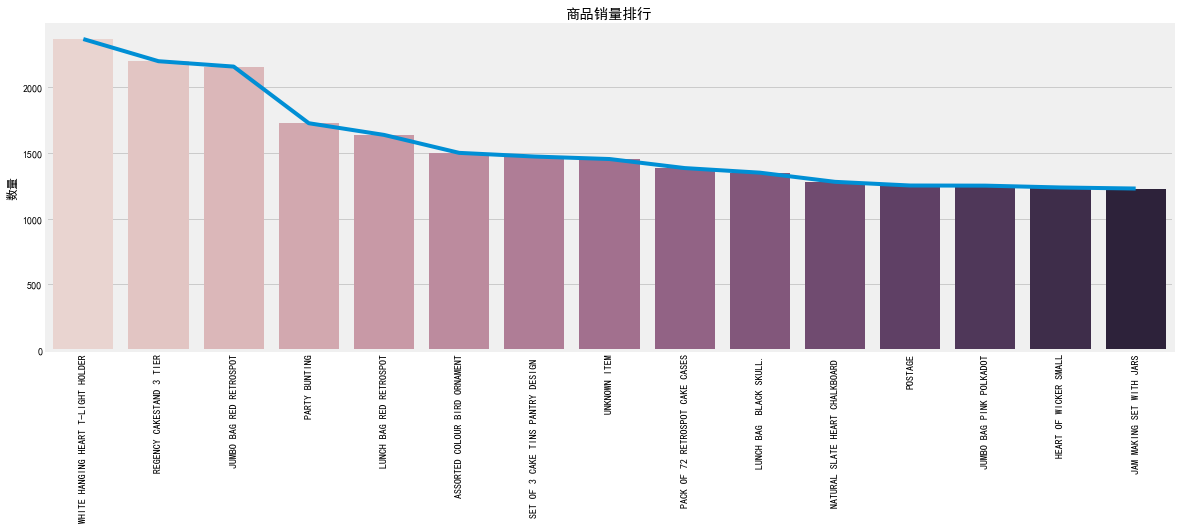

In [19]:
plt.figure(figsize=(18,6))
plt.plot(more_data)  # 折线图
sns.barplot(x=more_data.index, y=more_data.values, palette=sns.cubehelix_palette(15))   
# palette=sns.cubehelix_palette(15)  调色板:调色板名称    barplot  直方图
plt.ylabel("数量")
plt.title("商品销量排行")
plt.xticks(rotation=90)  
#plt.xticks([0,1],[1,2],rotation=0)
#[0,1]代表x坐标轴的0和1位置，[2,3]代表0,1位置的显示lable，rotation代表lable显示的旋转角度。

In [20]:
data['Description'].value_counts().tail(5)

BREAD BIN, DINER STYLE, IVORY         1
CAPIZ CHANDELIER                      1
SET/6 IVORY BIRD T-LIGHT CANDLES      1
EASTER CRAFT IVY WREATH WITH CHICK    1
HAPPY BIRTHDAY CARD TEDDY/CAKE        1
Name: Description, dtype: int64

分析：从上面的代码中注意到，有效项通常是大写的，无效项或取消项是小写的

In [21]:
# a = data['Description'].str.isupper()
# a
# data[~a]["Description"]

In [22]:
data[~data['Description'].str.isupper()]['Description'].value_counts().head(15)

Manual                                572
BAG 125g SWIRLY MARBLES               304
BAG 250g SWIRLY MARBLES               252
3 TRADITIONAl BISCUIT CUTTERS  SET    240
POLYESTER FILLER PAD 40x40cm          193
FRENCH BLUE METAL DOOR SIGN No        167
check                                 159
BAG 500g SWIRLY MARBLES               146
POLYESTER FILLER PAD 45x45cm          144
Next Day Carriage                      80
Discount                               77
?                                      47
damages                                45
damaged                                43
POLYESTER FILLER PAD 45x30cm           38
Name: Description, dtype: int64

快速检查一下描述中的字母情况，
发现有些单位的名称中有小写字母，而且小写记录可能是退回的。
在这里我们可以理解，存储中的数据管理是可以改进的。

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

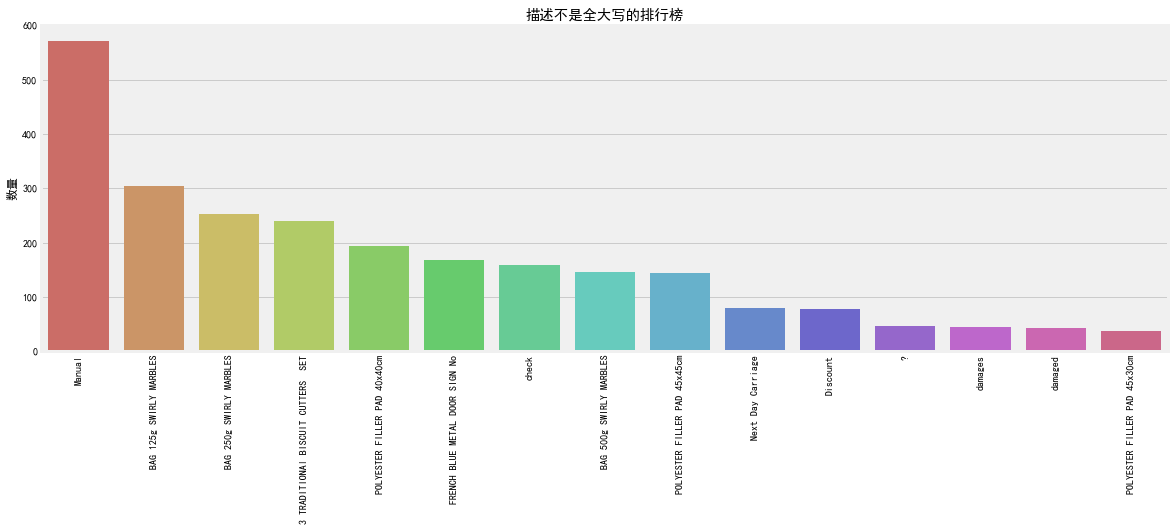

In [25]:
less_data = data[~data['Description'].str.isupper()]['Description'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(x=less_data.index, y=less_data.values, palette=sns.color_palette("hls",15))   
plt.ylabel("数量")
plt.title("描述不是全大写的排行榜")
plt.xticks(rotation=90)  


In [26]:
data.head(8)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country
InvoiceDate,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom
2010-12-01 08:26:00,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,7.65,United Kingdom
2010-12-01 08:26:00,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,4.25,United Kingdom
2010-12-01 08:28:00,536366,22633,HAND WARMER UNION JACK,6,1.85,United Kingdom


In [29]:
# 检查tockCode，看起来它们与描述紧密相关

In [28]:
data['StockCode'].value_counts().head(5)

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
Name: StockCode, dtype: int64

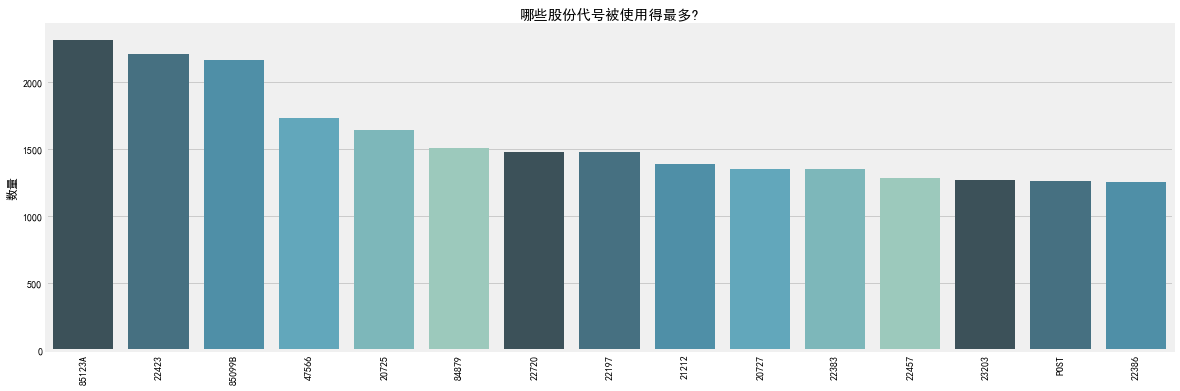

In [30]:
stock_counts = data['StockCode'].value_counts().head(15)
plt.figure(figsize=(18,6))
sns.barplot(stock_counts.index, stock_counts.values, palette=sns.color_palette("GnBu_d"))
plt.ylabel("数量")
plt.title("哪些股份代号被使用得最多?");
plt.xticks(rotation=90);

In [29]:
data['InvoiceNo'].value_counts().tail()

569489     1
C548015    1
C565582    1
547536     1
554299     1
Name: InvoiceNo, dtype: int64

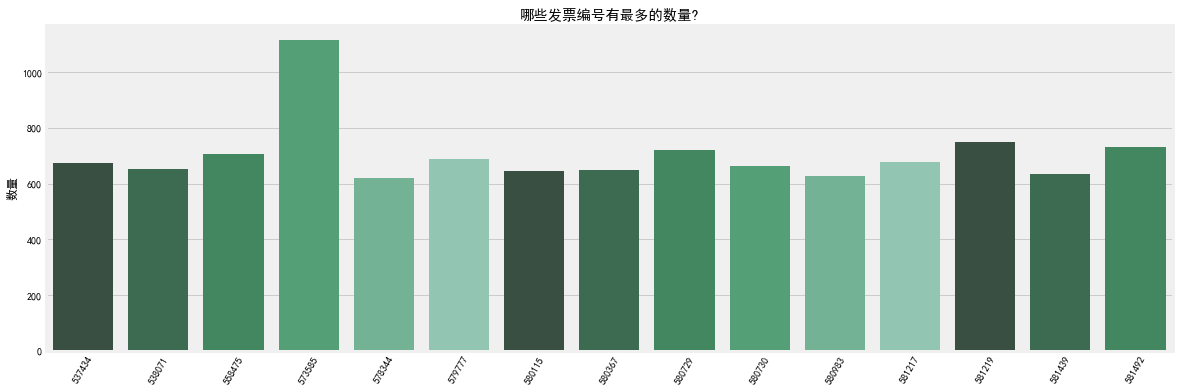

In [31]:
inv_counts = data['InvoiceNo'].value_counts().head(15)
plt.figure(figsize=(18,6))
sns.barplot(inv_counts.index, inv_counts.values, palette=sns.color_palette("BuGn_d"))
plt.ylabel("数量")
plt.title("哪些发票编号有最多的数量?");
plt.xticks(rotation=60);

In [35]:
data.head(3)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country
InvoiceDate,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom


In [32]:
# 查看以C开头的发票编号
data[data['InvoiceNo'].str.startswith('C')].describe()

,Quantity,UnitPrice
count,9288.000000,9288.000000
mean,-29.885228,48.393661
std,1145.786965,666.600430
min,-80995.000000,0.010000
25%,-6.000000,1.450000
50%,-2.000000,2.950000
75%,-1.000000,5.950000
max,-1.000000,38970.000000


分析：可能以“C”开头的发票是“取消”/“退回”的发票。这就解决了负数的神秘问题。
虽然，我们应该更深入地分析这些回数据，为了简单起见，我们暂时忽略这些值。


我们可以根据这些数据启动一个单独的项目，并预测商店的退货/取消率。

In [39]:
data.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [33]:
data_back =data[~data['InvoiceNo'].str.startswith('C')]

In [34]:
data_back.describe()

,Quantity,UnitPrice
count,532621.000000,532621.000000
mean,10.239972,3.847621
std,159.593551,41.758023
min,-9600.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,13541.330000


先看看负的量和负的价格

In [35]:
data_back[data_back["Quantity"] < 0].head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country
InvoiceDate,,,,,,
2010-12-01 16:50:00,536589,21777,UNKNOWN ITEM,-10,0.0,United Kingdom
2010-12-02 14:42:00,536764,84952C,UNKNOWN ITEM,-38,0.0,United Kingdom
2010-12-03 15:30:00,536996,22712,UNKNOWN ITEM,-20,0.0,United Kingdom
2010-12-03 15:30:00,536997,22028,UNKNOWN ITEM,-20,0.0,United Kingdom
2010-12-03 15:30:00,536998,85067,UNKNOWN ITEM,-6,0.0,United Kingdom


在这里我们可以看到其他“负值”似乎是损坏/丢失/未知的项目。为了对这个项目进行简单的分析，我们忽略它们。

In [36]:
data_back[data_back['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country
InvoiceDate,,,,,,
2011-08-12 14:51:00,A563186,B,Adjust bad debt,1,-11062.06,United Kingdom
2011-08-12 14:52:00,A563187,B,Adjust bad debt,1,-11062.06,United Kingdom


因为只有两行，所以暂时忽略它们(需要联系上下文理解，因为 描述 写的是 "调整坏账")

In [37]:
data =data_back[data_back['UnitPrice'] > 0]
data.describe()

,Quantity,UnitPrice
count,530104.000000,530104.000000
mean,10.542037,3.907625
std,155.524124,35.915681
min,1.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,13541.330000


完成数据清理并删除了所有可疑记录后，我们开始为我们的模型创建一些新特性。
我们有数量，有价格，我们可以计算收入。

In [38]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country
InvoiceDate,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom


In [39]:
data['Sales'] = data['Quantity'] * data['UnitPrice']

In [40]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Sales
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,20.34


EDA

(array([0]), <a list of 1 Text xticklabel objects>)

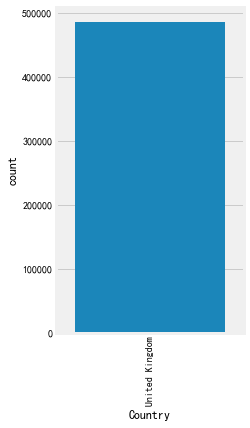

In [41]:
plt.figure(figsize=(3,6))
sns.countplot(data[data['Country'] == 'United Kingdom']['Country'])
# 统计df中‘Country’这个特征每种类别的数量
plt.xticks(rotation=90)

In [42]:
uk_count = data[data['Country'] == 'United Kingdom']['Country'].count()
all_count = data['Country'].count()
print(str('{0:.2f}%').format((uk_count/all_count)*100))

91.51%


从上面的图表和计算中我们可以看出：
绝大多数的销售是在英国完成的，
只有8.49%是在国外完成的。我们可以说我们的数据集偏向英国

检测异常值
有几种不同的方法来检测离群值:
箱形图，使用IQR，散点图也在某些情况下有效(这是其中之一)。
此外，使用散点图检测离群点非常直观。
绘制数据图并删除那些明显超出范围的数据点。如下图所示。

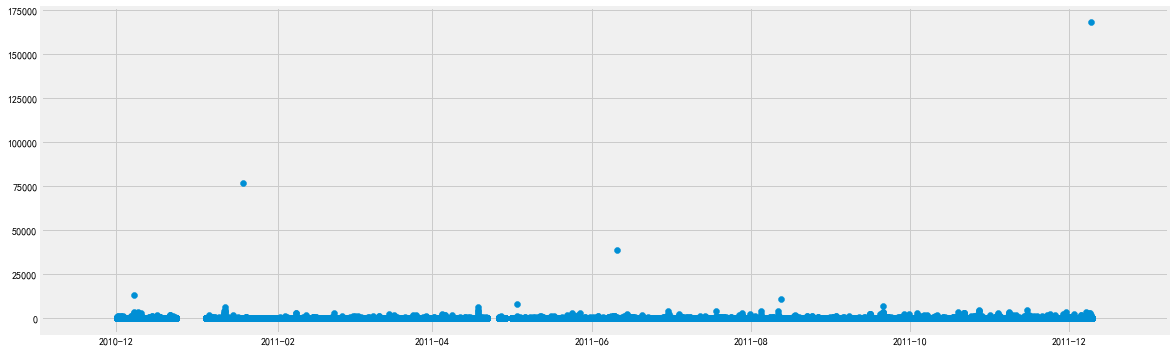

In [43]:
plt.figure(figsize=(18,6))
plt.scatter(x=data.index, y=data['Sales'])

(array([734107., 734169., 734228., 734289., 734350., 734411., 734472.]),
 <a list of 7 Text xticklabel objects>)

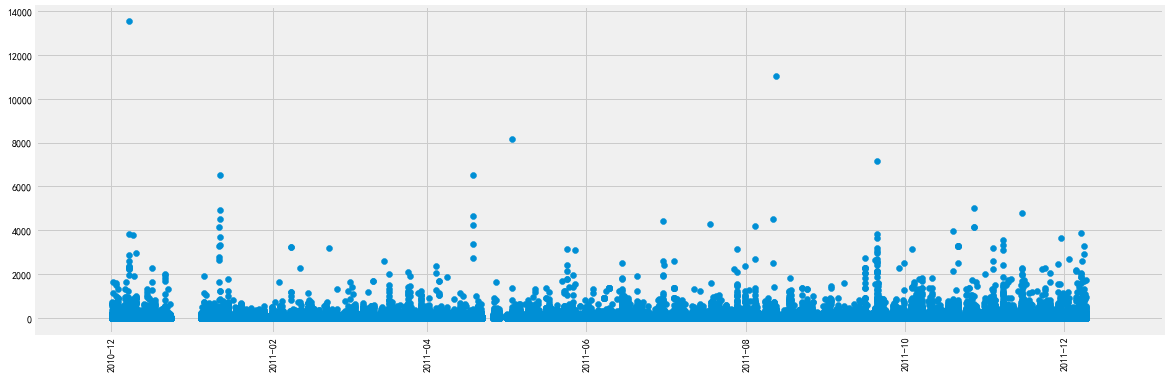

In [44]:
# 删除明显的异常值
da = data[data['Sales'] < 25000]
plt.figure(figsize=(18,6))
plt.scatter(x=da.index, y=da['Sales'])
plt.xticks(rotation=90)

In [45]:
# 一些值不符合正态分布。
# 为了更好地理解数据的分布，检查一下数值特性的不同百分位数
da.quantile([0.05, 0.95, 0.98, 0.99, 0.999])

,Quantity,UnitPrice,Sales
0.050,1.0,0.42,1.25
0.950,30.0,9.95,59.70
0.980,72.0,14.95,121.68
0.990,100.0,16.98,183.60
0.999,446.4,165.00,833.79


我们可以看到，如果我们删除前2%的数据点，我们就会去掉绝对的异常值，并拥有更多的平衡数据集。

In [46]:
da.describe()

,Quantity,UnitPrice,Sales
count,530101.000000,530101.000000,530101.000000
mean,10.249190,3.906416,19.585063
std,37.793522,35.904835,73.964219
min,1.000000,0.001000,0.001000
25%,1.000000,1.250000,3.750000
50%,3.000000,2.080000,9.900000
75%,10.000000,4.130000,17.700000
max,4800.000000,13541.330000,13541.330000


(array([734107., 734169., 734228., 734289., 734350., 734411., 734472.]),
 <a list of 7 Text xticklabel objects>)

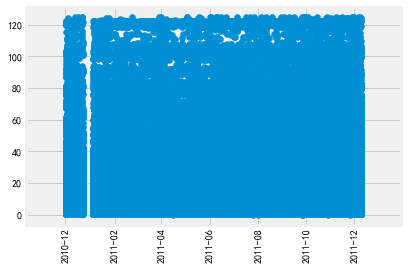

In [47]:
df_quantile = da[da['Sales'] < 125]
plt.scatter(x=df_quantile.index, y=df_quantile['Sales'])
plt.xticks(rotation=90)

In [48]:
df_quantile.describe()

,Quantity,UnitPrice,Sales
count,519958.000000,519958.000000,519958.000000
mean,7.850934,3.286582,13.850263
std,15.303867,3.949021,16.330954
min,1.000000,0.001000,0.001000
25%,1.000000,1.250000,3.750000
50%,3.000000,2.080000,9.840000
75%,10.000000,4.130000,17.220000
max,1600.000000,124.870000,124.950000


我们的数据差不多可以建模。我们进行了清理，我们删除了干扰数据集平衡的异常值，我们删除了无效记录

直观地查看数字特性的分布

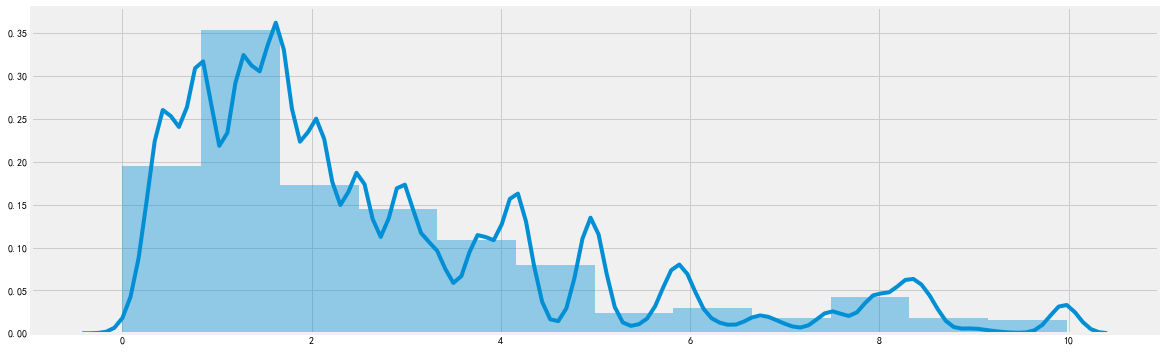

In [49]:
plt.figure(figsize=(18,6))
sns.distplot(df_quantile[df_quantile['UnitPrice'] < 10]['UnitPrice'].values, kde=True, bins=12)
# kde=True/ Flase 是否绘制高斯核密度估计  bins=12  直方图的 柱状数 数是12

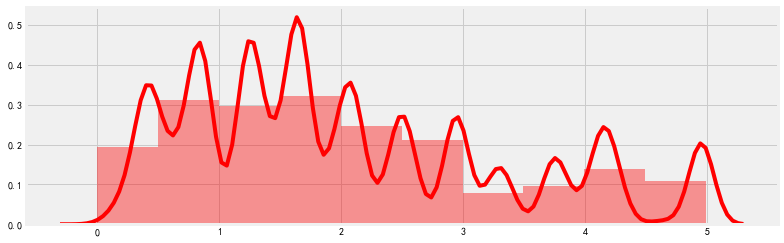

In [50]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['UnitPrice'] < 5]['UnitPrice'].values, kde=True, bins=10,color="red")
# kde=True/ Flase 是否绘制高斯核密度估计  bins=12  直方图的 柱状数 数是12

# 从这些柱状图中我们可以看到，这家商店出售的绝大多数商品价格都很低，从0英镑到3英镑不等

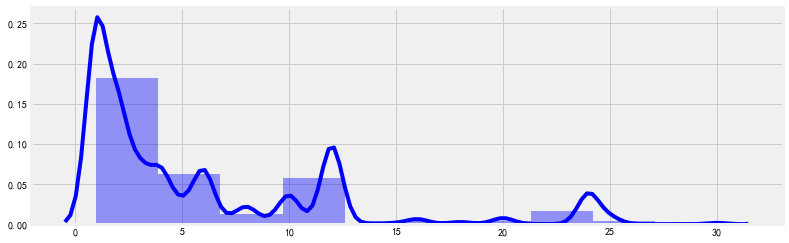

In [51]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['Quantity'] <= 30]['Quantity'].values, kde=True, bins=10,color="blue")
# kde=True/ Flase 是否绘制高斯核密度估计  bins=12  直方图的 柱状数 数是12

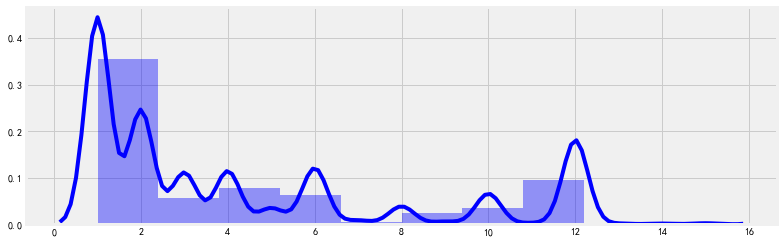

In [52]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['Quantity'] <= 15]['Quantity'].values, kde=True, bins=10,color="blue")
# kde=True/ Flase 是否绘制高斯核密度估计  bins=12  直方图的 柱状数 数是12

从这些柱状图中我们可以看出，
人们通常会购买1-5件商品或者10-12件商品
推测也许会有一些成套商品的报价?

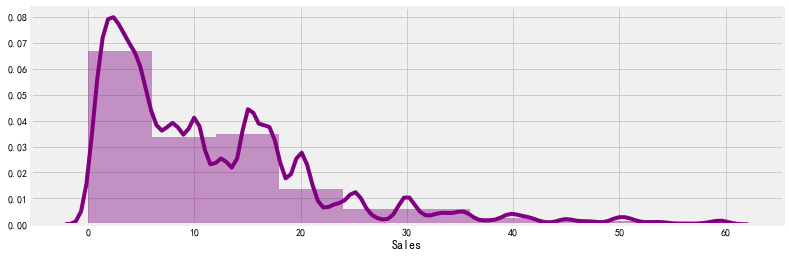

In [53]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['Sales'] < 60]['Sales'], kde=True, bins=10, color='purple')

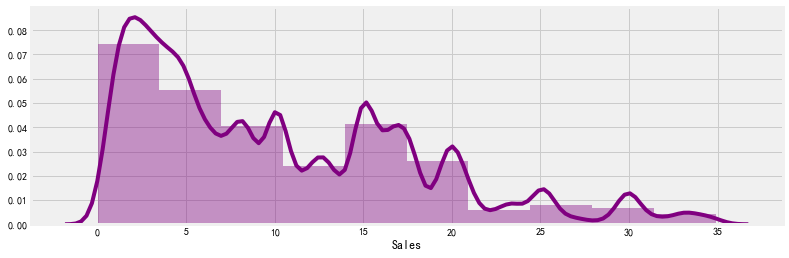

In [54]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['Sales'] < 35]['Sales'], kde=True, bins=10, color='purple')

从这些柱状图中我们可以看出，每笔订单的销售额在1-17英镑之间。

 # 分析一段时间内的销售情况

In [55]:
da_ts = da[['Sales']]
da_ts.head(8)

,Sales
InvoiceDate,
2010-12-01 08:26:00,15.30
2010-12-01 08:26:00,20.34
2010-12-01 08:26:00,22.00
2010-12-01 08:26:00,20.34
2010-12-01 08:26:00,20.34
2010-12-01 08:26:00,15.30
2010-12-01 08:26:00,25.50
2010-12-01 08:28:00,11.10


每个发票都有自己的时间戳(基于订单的时间)。
我们可以重新采样时间数据，例如星期，并尝试分析是否有多种模式

<Figure size 1296x432 with 0 Axes>

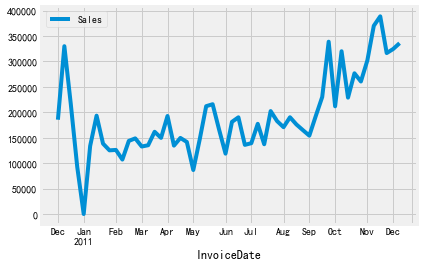

In [56]:
plt.figure(figsize=(18,6))
df_resample = da_ts.resample('W').sum()
df_resample.plot()

In [ ]:
一月份销售额为零的那个星期看起来很可疑

In [57]:
df_resample['12-2010':'01-2011']

,Sales
InvoiceDate,
2010-12-05,185427.83
2010-12-12,329936.81
2010-12-19,216012.20
2010-12-26,92369.30
2011-01-02,0.00
2011-01-09,133658.19
2011-01-16,193362.04
2011-01-23,138349.58
2011-01-30,125170.79


In [ ]:
新年假期期间，商店是关闭的，没有处理订单，这就是为什么他们没有做任何销售。

 # 模和特性创建准备数据

In [58]:
da_clean = da[da['UnitPrice'] < 15]
da_clean.describe()

,Quantity,UnitPrice,Sales
count,520393.000000,520393.000000,520393.000000
mean,10.409364,2.978735,18.669870
std,38.123726,2.669829,64.710055
min,1.000000,0.001000,0.001000
25%,1.000000,1.250000,3.750000
50%,4.000000,2.080000,9.840000
75%,12.000000,4.130000,17.400000
max,4800.000000,14.960000,7144.720000


可能影响销售输出的一个特性是“每张发票的数量”。增加这个特性的数据

In [59]:
# 以发票编号分组，查看对应的数量
da_join = da_clean.groupby('InvoiceNo')[['Quantity']].sum()
da_join

,Quantity
InvoiceNo,
536365,40
536366,12
536367,83
536368,15
536369,3
536370,446
536371,80
536372,12
536373,88


In [60]:
da_join = da_join.reset_index()
da_join.head()

,InvoiceNo,Quantity
0,536365,40
1,536366,12
2,536367,83
3,536368,15
4,536369,3


In [61]:
da_clean.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Sales
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,20.34


In [62]:
# 把发票编号对应的  总个数加入表中
da_clean['InvoiceDate'] = da_clean.index
da_clean = da_clean.merge(da_join, how='left', on='InvoiceNo')
da_clean.head(15)

,InvoiceNo,StockCode,Description,Quantity_x,UnitPrice,Country,Sales,InvoiceDate,Quantity_y
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,15.30,2010-12-01 08:26:00,40
1,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,20.34,2010-12-01 08:26:00,40
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,22.00,2010-12-01 08:26:00,40
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,20.34,2010-12-01 08:26:00,40
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,20.34,2010-12-01 08:26:00,40
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,7.65,United Kingdom,15.30,2010-12-01 08:26:00,40
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,4.25,United Kingdom,25.50,2010-12-01 08:26:00,40
7,536366,22633,HAND WARMER UNION JACK,6,1.85,United Kingdom,11.10,2010-12-01 08:28:00,12
8,536366,22632,HAND WARMER RED POLKA DOT,6,1.85,United Kingdom,11.10,2010-12-01 08:28:00,12
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,1.69,United Kingdom,54.08,2010-12-01 08:34:00,83


In [63]:
da_clean = da_clean.rename(columns={'Quantity_x' : 'Quantity', 'Quantity_y' : 'QuantityInv'})
da_clean.head(15)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Sales,InvoiceDate,QuantityInv
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,15.30,2010-12-01 08:26:00,40
1,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,20.34,2010-12-01 08:26:00,40
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,22.00,2010-12-01 08:26:00,40
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,20.34,2010-12-01 08:26:00,40
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,20.34,2010-12-01 08:26:00,40
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,7.65,United Kingdom,15.30,2010-12-01 08:26:00,40
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,4.25,United Kingdom,25.50,2010-12-01 08:26:00,40
7,536366,22633,HAND WARMER UNION JACK,6,1.85,United Kingdom,11.10,2010-12-01 08:28:00,12
8,536366,22632,HAND WARMER RED POLKA DOT,6,1.85,United Kingdom,11.10,2010-12-01 08:28:00,12
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,1.69,United Kingdom,54.08,2010-12-01 08:34:00,83


In [68]:
da_clean.shape

(520393, 9)

In [69]:
da_clean['InvoiceDate'] = pd.to_datetime(da_clean['InvoiceDate'])

In [70]:
da_clean.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
UnitPrice             float64
Country                object
Sales                 float64
InvoiceDate    datetime64[ns]
QuantityInv             int64
dtype: object

 # 扣货数量及单价特点

基于前面的EDA，
我们可以使用panda .cut()方法将这些特性分为6个范围(数量)和5个范围(单价)。

In [71]:
bins_q = pd.IntervalIndex.from_tuples([(0, 2), (2, 5), (5, 8), (8, 11), (11, 14), (15, 5000)])
da_clean['QuantityRange'] = pd.cut(da_clean['Quantity'], bins=bins_q)
bins_p = pd.IntervalIndex.from_tuples([(0, 1), (1, 2), (2, 3), (3, 4), (4, 20)])
da_clean['PriceRange'] = pd.cut(da_clean['UnitPrice'], bins=bins_p)
da_clean.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Sales,InvoiceDate,QuantityInv,QuantityRange,PriceRange
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,15.30,2010-12-01 08:26:00,40,"(5, 8]","(2, 3]"
1,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,20.34,2010-12-01 08:26:00,40,"(5, 8]","(3, 4]"
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,22.00,2010-12-01 08:26:00,40,"(5, 8]","(2, 3]"
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,20.34,2010-12-01 08:26:00,40,"(5, 8]","(3, 4]"
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,20.34,2010-12-01 08:26:00,40,"(5, 8]","(3, 4]"


季节的不同，礼物的销售情况也不同
第4季度的pick of sales，在第二年的第一季度急剧下降，
直到第4季度的pick of sales再次增长。
通过观察，我们可以创建另一个特性来改进我们的模型。

In [72]:
da_clean['Month'] = da_clean['InvoiceDate'].dt.month
da_clean.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Sales,InvoiceDate,QuantityInv,QuantityRange,PriceRange,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,15.30,2010-12-01 08:26:00,40,"(5, 8]","(2, 3]",12
1,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,20.34,2010-12-01 08:26:00,40,"(5, 8]","(3, 4]",12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,22.00,2010-12-01 08:26:00,40,"(5, 8]","(2, 3]",12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,20.34,2010-12-01 08:26:00,40,"(5, 8]","(3, 4]",12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,20.34,2010-12-01 08:26:00,40,"(5, 8]","(3, 4]",12


In [73]:
bins_d = pd.IntervalIndex.from_tuples([(0,3),(3,6),(6,9),(9,12)])
da_clean['DateRange'] = pd.cut(da_clean['Month'], bins=bins_d, labels=['q1','q2','q3','q4'])
da_clean.tail()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Sales,InvoiceDate,QuantityInv,QuantityRange,PriceRange,Month,DateRange
520388,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,France,10.20,2011-12-09 12:50:00,105,"(11, 14]","(0, 1]",12,"(9, 12]"
520389,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,France,12.60,2011-12-09 12:50:00,105,"(5, 8]","(2, 3]",12,"(9, 12]"
520390,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,France,16.60,2011-12-09 12:50:00,105,"(2, 5]","(4, 20]",12,"(9, 12]"
520391,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,France,16.60,2011-12-09 12:50:00,105,"(2, 5]","(4, 20]",12,"(9, 12]"
520392,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,4.95,France,14.85,2011-12-09 12:50:00,105,"(2, 5]","(4, 20]",12,"(9, 12]"


 #  建立一个模型

将数据分为英国和非英国
我们必须对这两个数据集分别进行分析，以便为一个模型提供更多的标准化数据，
因为有些模式可能适用于其他国家而不适用于英国，
反之亦然。
还有一个需要验证的假设——为英国建立的模型在其他国家的数据上表现良好吗?

In [74]:
da_uk = da_clean[da_clean['Country'] == 'United Kingdom']
da_abroad = da_clean[da_clean['Country'] != 'United Kingdom']

In [75]:
da_uk.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Sales,InvoiceDate,QuantityInv,QuantityRange,PriceRange,Month,DateRange
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,15.30,2010-12-01 08:26:00,40,"(5, 8]","(2, 3]",12,"(9, 12]"
1,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,20.34,2010-12-01 08:26:00,40,"(5, 8]","(3, 4]",12,"(9, 12]"
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,22.00,2010-12-01 08:26:00,40,"(5, 8]","(2, 3]",12,"(9, 12]"
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,20.34,2010-12-01 08:26:00,40,"(5, 8]","(3, 4]",12,"(9, 12]"
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,20.34,2010-12-01 08:26:00,40,"(5, 8]","(3, 4]",12,"(9, 12]"


In [76]:
da_abroad.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Sales,InvoiceDate,QuantityInv,QuantityRange,PriceRange,Month,DateRange
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,3.75,France,90.0,2010-12-01 08:45:00,446,"(15, 5000]","(3, 4]",12,"(9, 12]"
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,3.75,France,90.0,2010-12-01 08:45:00,446,"(15, 5000]","(3, 4]",12,"(9, 12]"
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,3.75,France,45.0,2010-12-01 08:45:00,446,"(11, 14]","(3, 4]",12,"(9, 12]"
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,0.85,France,10.2,2010-12-01 08:45:00,446,"(11, 14]","(0, 1]",12,"(9, 12]"
30,536370,21883,STARS GIFT TAPE,24,0.65,France,15.6,2010-12-01 08:45:00,446,"(15, 5000]","(0, 1]",12,"(9, 12]"


提取特征并创建虚拟变量

In [77]:
da_uk_model = da_uk[['Sales', 'QuantityInv', 'QuantityRange', 'PriceRange', 'DateRange']]
da_uk_model.head()



,Sales,QuantityInv,QuantityRange,PriceRange,DateRange
0,15.30,40,"(5, 8]","(2, 3]","(9, 12]"
1,20.34,40,"(5, 8]","(3, 4]","(9, 12]"
2,22.00,40,"(5, 8]","(2, 3]","(9, 12]"
3,20.34,40,"(5, 8]","(3, 4]","(9, 12]"
4,20.34,40,"(5, 8]","(3, 4]","(9, 12]"


In [78]:
df_data = da_uk_model.copy()
df_data = pd.get_dummies(df_data, columns=['QuantityRange'], prefix='qr')
df_data = pd.get_dummies(df_data, columns=['PriceRange'], prefix='pr')
df_data = pd.get_dummies(df_data, columns=['DateRange'], prefix='dr')
df_data.head()

,Sales,QuantityInv,"qr_(0, 2]","qr_(2, 5]","qr_(5, 8]","qr_(8, 11]","qr_(11, 14]","qr_(15, 5000]","pr_(0, 1]","pr_(1, 2]","pr_(2, 3]","pr_(3, 4]","pr_(4, 20]","dr_(0, 3]","dr_(3, 6]","dr_(6, 9]","dr_(9, 12]"
0,15.30,40,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1,20.34,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,22.00,40,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
3,20.34,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
4,20.34,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1


In [79]:
df_data.head(10)

,Sales,QuantityInv,"qr_(0, 2]","qr_(2, 5]","qr_(5, 8]","qr_(8, 11]","qr_(11, 14]","qr_(15, 5000]","pr_(0, 1]","pr_(1, 2]","pr_(2, 3]","pr_(3, 4]","pr_(4, 20]","dr_(0, 3]","dr_(3, 6]","dr_(6, 9]","dr_(9, 12]"
0,15.30,40,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1,20.34,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,22.00,40,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
3,20.34,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
4,20.34,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
5,15.30,40,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
6,25.50,40,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
7,11.10,12,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
8,11.10,12,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
9,54.08,83,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1


由于我们的大多数功能都在0-1的范围内，
所以扩展“QuantityInv”功能也是有意义的。
通常，扩展特性是很好的

#  不做处理 归一化 便准化


In [138]:
y = df_data['Sales']
X = df_data.drop(columns=['Sales'])

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

测试和验证不同的模型
使用GridSearch和交叉验证来测试三种回归量:线性、决策树和随机森林

In [146]:
# Linear Regression 线性回归
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train,y_train).score(X_test,y_test)

0.15627993211506638

In [147]:
# 查看在训练样本集中的表现
linear_model2 = LinearRegression()
linear_model2.fit(X_train,y_train).score(X_train,y_train)

0.17393521098933729

In [148]:
# Decision Tree 决策数
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train,y_train).score(X_test,y_test)

0.5775940253229663

In [107]:
# 查看在训练样本集中的表现
tree_model2 = DecisionTreeRegressor()
tree_model2.fit(X_train,y_train).score(X_train,y_train)

0.816850937473268

In [149]:
# Random Forest 随机森林
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor()
forest_model.fit(X_train,y_train).score(X_train,y_train)

0.7802018083061245

In [150]:
# 查看在训练样本集中的表现
forest_model2 = RandomForestRegressor()
forest_model2.fit(X_train,y_train).score(X_train,y_train)

0.7747894520590504

# 归一化
消除数据之间的量纲 各个属性之间 字啊统一个量纲上 映射0-1之间的数据

In [110]:
from sklearn.preprocessing import MinMaxScaler 
min_max_sacler = MinMaxScaler()
min_max_sacler.fit(df_data)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [112]:
df_data1 = min_max_sacler.transform(df_data)
df_data1

array([[0.0021413 , 0.00275677, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.00284672, 0.00275677, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.00307906, 0.00275677, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.00419877, 0.00459461, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.03006402, 0.00459461, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.00990928, 0.00459461, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [113]:
df_data2 = pd.DataFrame(df_data1)
df_data2.columns = df_data.columns
df_data2.head()

,Sales,QuantityInv,"qr_(0, 2]","qr_(2, 5]","qr_(5, 8]","qr_(8, 11]","qr_(11, 14]","qr_(15, 5000]","pr_(0, 1]","pr_(1, 2]","pr_(2, 3]","pr_(3, 4]","pr_(4, 20]","dr_(0, 3]","dr_(3, 6]","dr_(6, 9]","dr_(9, 12]"
0,0.002141,0.002757,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.002847,0.002757,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.003079,0.002757,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.002847,0.002757,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.002847,0.002757,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# 标准化 

In [114]:
from sklearn.preprocessing import StandardScaler
Standard = StandardScaler()
Standard.fit(df_data2)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [115]:
df_data3 = Standard.transform(df_data2)
df_data3

array([[-0.03009143, -0.66421296, -0.91158079, ..., -0.4848806 ,
        -0.54312979,  1.22625366],
       [ 0.04940458, -0.66421296, -0.91158079, ..., -0.4848806 ,
        -0.54312979,  1.22625366],
       [ 0.07558778, -0.66421296, -0.91158079, ..., -0.4848806 ,
        -0.54312979,  1.22625366],
       ...,
       [ 0.20177191, -0.62578524, -0.91158079, ..., -0.4848806 ,
        -0.54312979,  1.22625366],
       [ 3.11662537, -0.62578524, -0.91158079, ..., -0.4848806 ,
        -0.54312979,  1.22625366],
       [ 0.84531099, -0.62578524, -0.91158079, ..., -0.4848806 ,
        -0.54312979,  1.22625366]])

In [116]:
data_new = pd.DataFrame(df_data3)
data_new.columns = df_data.columns
data_new.head()

,Sales,QuantityInv,"qr_(0, 2]","qr_(2, 5]","qr_(5, 8]","qr_(8, 11]","qr_(11, 14]","qr_(15, 5000]","pr_(0, 1]","pr_(1, 2]","pr_(2, 3]","pr_(3, 4]","pr_(4, 20]","dr_(0, 3]","dr_(3, 6]","dr_(6, 9]","dr_(9, 12]"
0,-0.030091,-0.664213,-0.911581,-0.451923,2.959935,-0.22112,-0.348036,-0.365556,-0.51742,-0.596632,2.030558,-0.285994,-0.585811,-0.472394,-0.484881,-0.54313,1.226254
1,0.049405,-0.664213,-0.911581,-0.451923,2.959935,-0.22112,-0.348036,-0.365556,-0.51742,-0.596632,-0.492475,3.496581,-0.585811,-0.472394,-0.484881,-0.54313,1.226254
2,0.075588,-0.664213,-0.911581,-0.451923,2.959935,-0.22112,-0.348036,-0.365556,-0.51742,-0.596632,2.030558,-0.285994,-0.585811,-0.472394,-0.484881,-0.54313,1.226254
3,0.049405,-0.664213,-0.911581,-0.451923,2.959935,-0.22112,-0.348036,-0.365556,-0.51742,-0.596632,-0.492475,3.496581,-0.585811,-0.472394,-0.484881,-0.54313,1.226254
4,0.049405,-0.664213,-0.911581,-0.451923,2.959935,-0.22112,-0.348036,-0.365556,-0.51742,-0.596632,-0.492475,3.496581,-0.585811,-0.472394,-0.484881,-0.54313,1.226254


In [117]:
y_ = data_new['Sales']
X_ = data_new.drop(columns=['Sales'])

In [118]:
from sklearn.model_selection import train_test_split
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size = 0.20, random_state=42)

测试和验证不同的模型
使用GridSearch和交叉验证来测试三种回归量:线性、决策树和随机森林

In [121]:
# Linear Regression 线性回归
from sklearn.linear_model import LinearRegression
linear_model_ = LinearRegression().fit(X_train_,y_train_).score(X_test_,y_test_)
linear_model_

0.15627993211506638

In [122]:
linear_model2_ = LinearRegression().fit(X_train_,y_train_).score(X_train_,y_train_)
linear_model2_

0.17393521098933729

In [123]:
# Decision Tree 决策数
from sklearn.tree import DecisionTreeRegressor
tree_model_ = DecisionTreeRegressor().fit(X_train_,y_train_).score(X_test_,y_test_)
tree_model_

0.5800786981020222

In [124]:
tree_model2_ = DecisionTreeRegressor().fit(X_train_,y_train_).score(X_train_,y_train_)
tree_model2_

0.816850937473268

In [125]:
# Random Forest 随机森林
from sklearn.ensemble import RandomForestRegressor
forest_model_ = RandomForestRegressor().fit(X_train_,y_train_).score(X_train_,y_train_)
forest_model_

0.7732124086947026

In [126]:
forest_model2_ = RandomForestRegressor().fit(X_train_,y_train_).score(X_train_,y_train_)
forest_model2_

0.7727854056401245

由上面的代码比较可以得出，该数据不用归一化和标准化化

In [151]:
license_pre = linear_model.predict(X_test)
tree_model_pre = tree_model.predict(X_test)
forest_model_pre = forest_model.predict(X_test)

In [156]:
forest_model_pre.shape

(95395,)

In [167]:
x = np.random.randint(0,400,size=95395)
x.shape

(95395,)

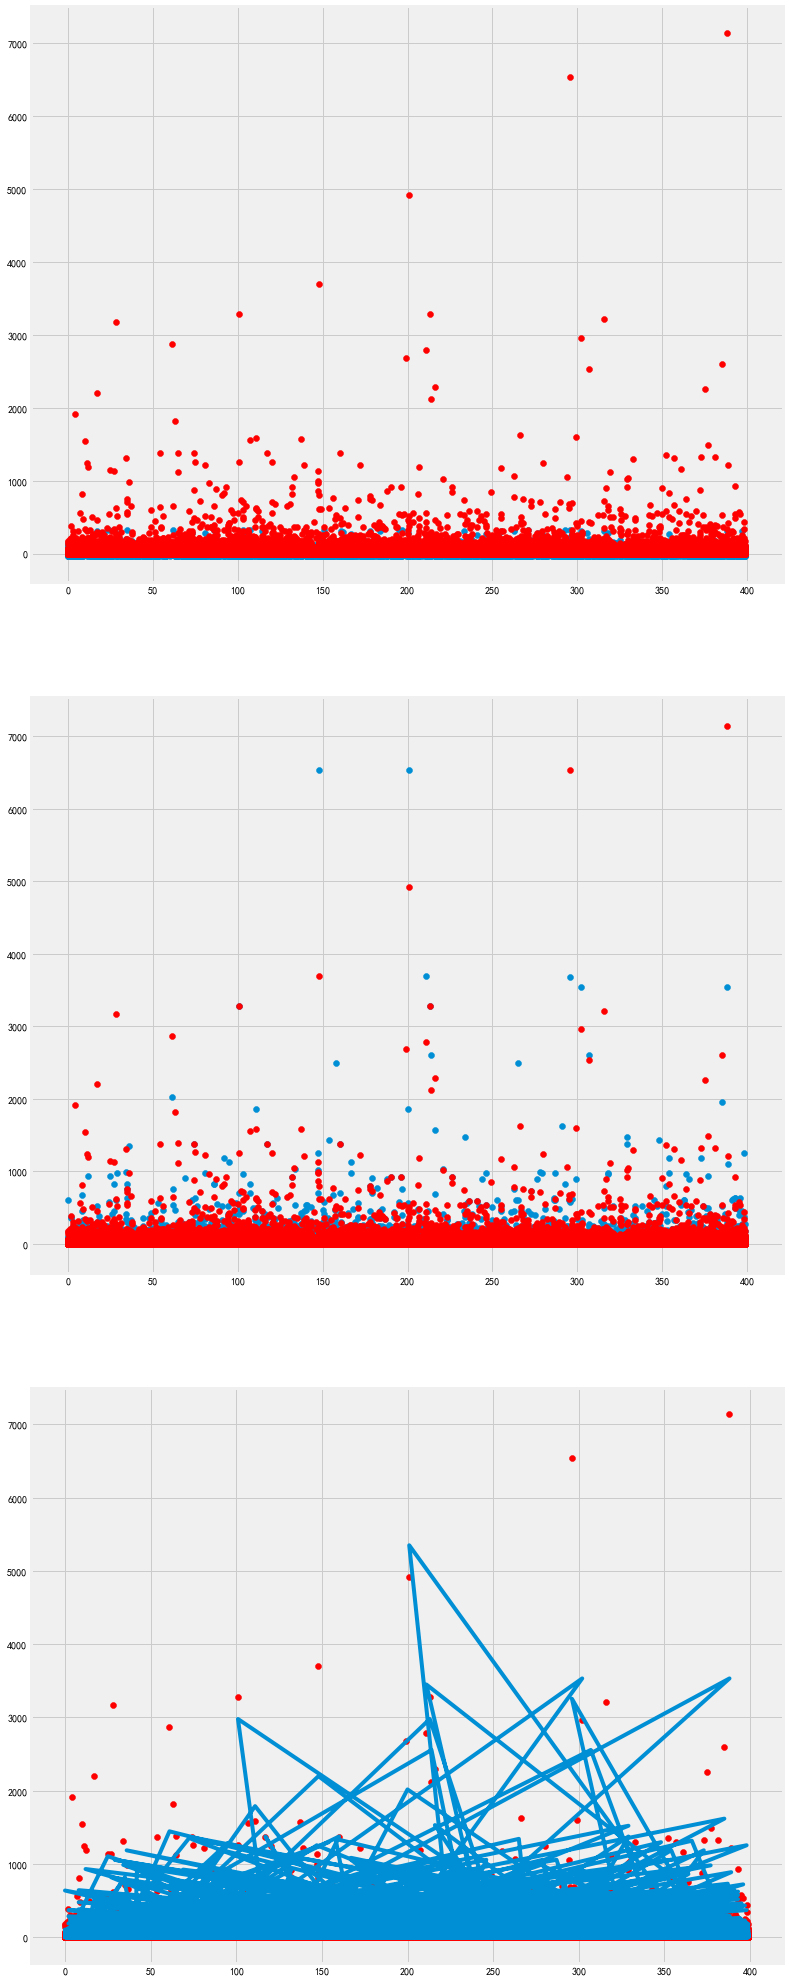

In [168]:
plt.figure(figsize=(12,36))
plt.subplot(3,1,1)
plt.scatter(x,license_pre)
plt.scatter(x,y_test,c="r")

plt.subplot(3,1,2)
plt.scatter(x,tree_model_pre)
plt.scatter(x,y_test,c="r")

plt.subplot(3,1,3)
plt.scatter(x,y_test,c="r")
plt.plot(x,forest_model_pre)

从上面的计算和图可以得出，用随机森林预测的模型拟合性最好，但是还不够优化，还需继续优化.